In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/car_price_dataset.csv


## 1. Introduction

In today's automotive market, accurately estimating car prices is crucial for buyers, sellers, and dealerships. Car prices depend on multiple factors such as brand, model, year of manufacture, engine size, fuel type, transmission, mileage, and ownership history. However, manually evaluating these factors to determine a fair price can be time-consuming and inconsistent.

This project aims to develop a machine learning model that predicts the price of a car based on its characteristics. By leveraging data-driven insights, we seek to create a model that can provide reliable price estimates, assisting buyers in making informed purchasing decisions and helping sellers set competitive and fair prices.

#### **Project Overview & Process**
To build an effective car price prediction system, we will follow a structured machine learning workflow:

- 1️⃣ Data Exploration (EDA) – We will analyze the dataset to understand its structure, identify missing values, detect outliers, and visualize key relationships between car features and price.

- 2️⃣ Data Preprocessing – This step includes handling missing values, encoding categorical variables, scaling numerical features, and preparing the dataset for modeling.

- 3️⃣ Model Selection & Training – We will train multiple regression models, including:

Linear Regression
Random Forest Regressor
XGBoost Regressor
Support Vector Regression (SVR)
Each model will be evaluated based on performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.

- 4️⃣ Model Evaluation & Comparison – After training the models, we will compare their performance to determine the most accurate and reliable model for price prediction.

- 5️⃣ Deployment – The best-performing model will be deployed as an application, allowing users to input car details and receive an estimated price in real-time.

#### **Expected Outcome**
By the end of this project, we aim to:

✅ Develop a high-accuracy machine learning model that can predict car prices based on key attributes.
✅ Provide insights into how different factors affect car pricing, helping users understand market trends.
✅ Deploy the model as a real-world application, making price estimation accessible and efficient.

Let's begin.

## 2. Importing Libraries and Loading Data

In [22]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset and glimpse the first 5 entries
df = pd.read_csv('/kaggle/input/car-price-dataset/car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## 3. EDA

In [3]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
# check for null variables
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [5]:
# check to see if there are any duplicated entries
df.duplicated().sum()

0

In [8]:
# check column dtypes
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [9]:
# Check unique values for categorical columns
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Brand: ['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford']
Unique values in Model: ['Rio' 'Malibu' 'GLA' 'Q5' 'Golf' 'Camry' 'Civic' 'Sportage' 'RAV4'
 '5 Series' 'CR-V' 'Elantra' 'Tiguan' 'Equinox' 'Explorer' 'A3' '3 Series'
 'Tucson' 'Passat' 'Impala' 'Corolla' 'Optima' 'Fiesta' 'A4' 'Focus'
 'E-Class' 'Sonata' 'C-Class' 'X5' 'Accord']
Unique values in Fuel_Type: ['Diesel' 'Hybrid' 'Electric' 'Petrol']
Unique values in Transmission: ['Manual' 'Automatic' 'Semi-Automatic']


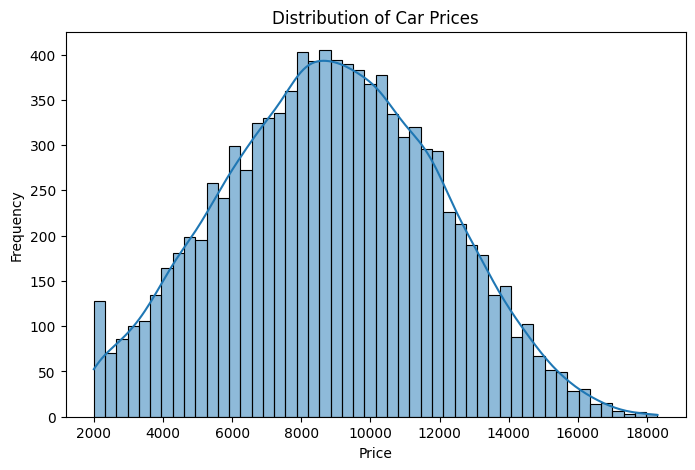

In [11]:
# Plot the distribution of car prices
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

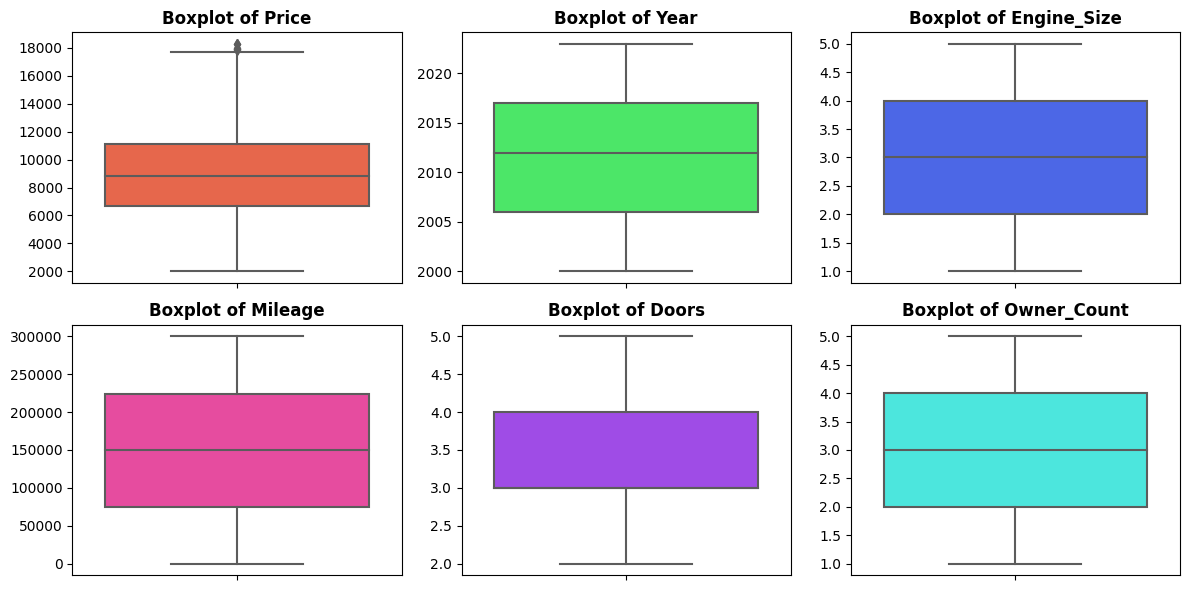

In [14]:
# Define numerical columns to plot
num_cols = ["Price", "Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

# Define color palette
boxplot_colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#A133FF", "#33FFF3"]

# Plot boxplots
plt.figure(figsize=(12, 6))
for i, (col, color) in enumerate(zip(num_cols, boxplot_colors), 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight="bold")
    plt.ylabel("")
plt.tight_layout()
plt.show()

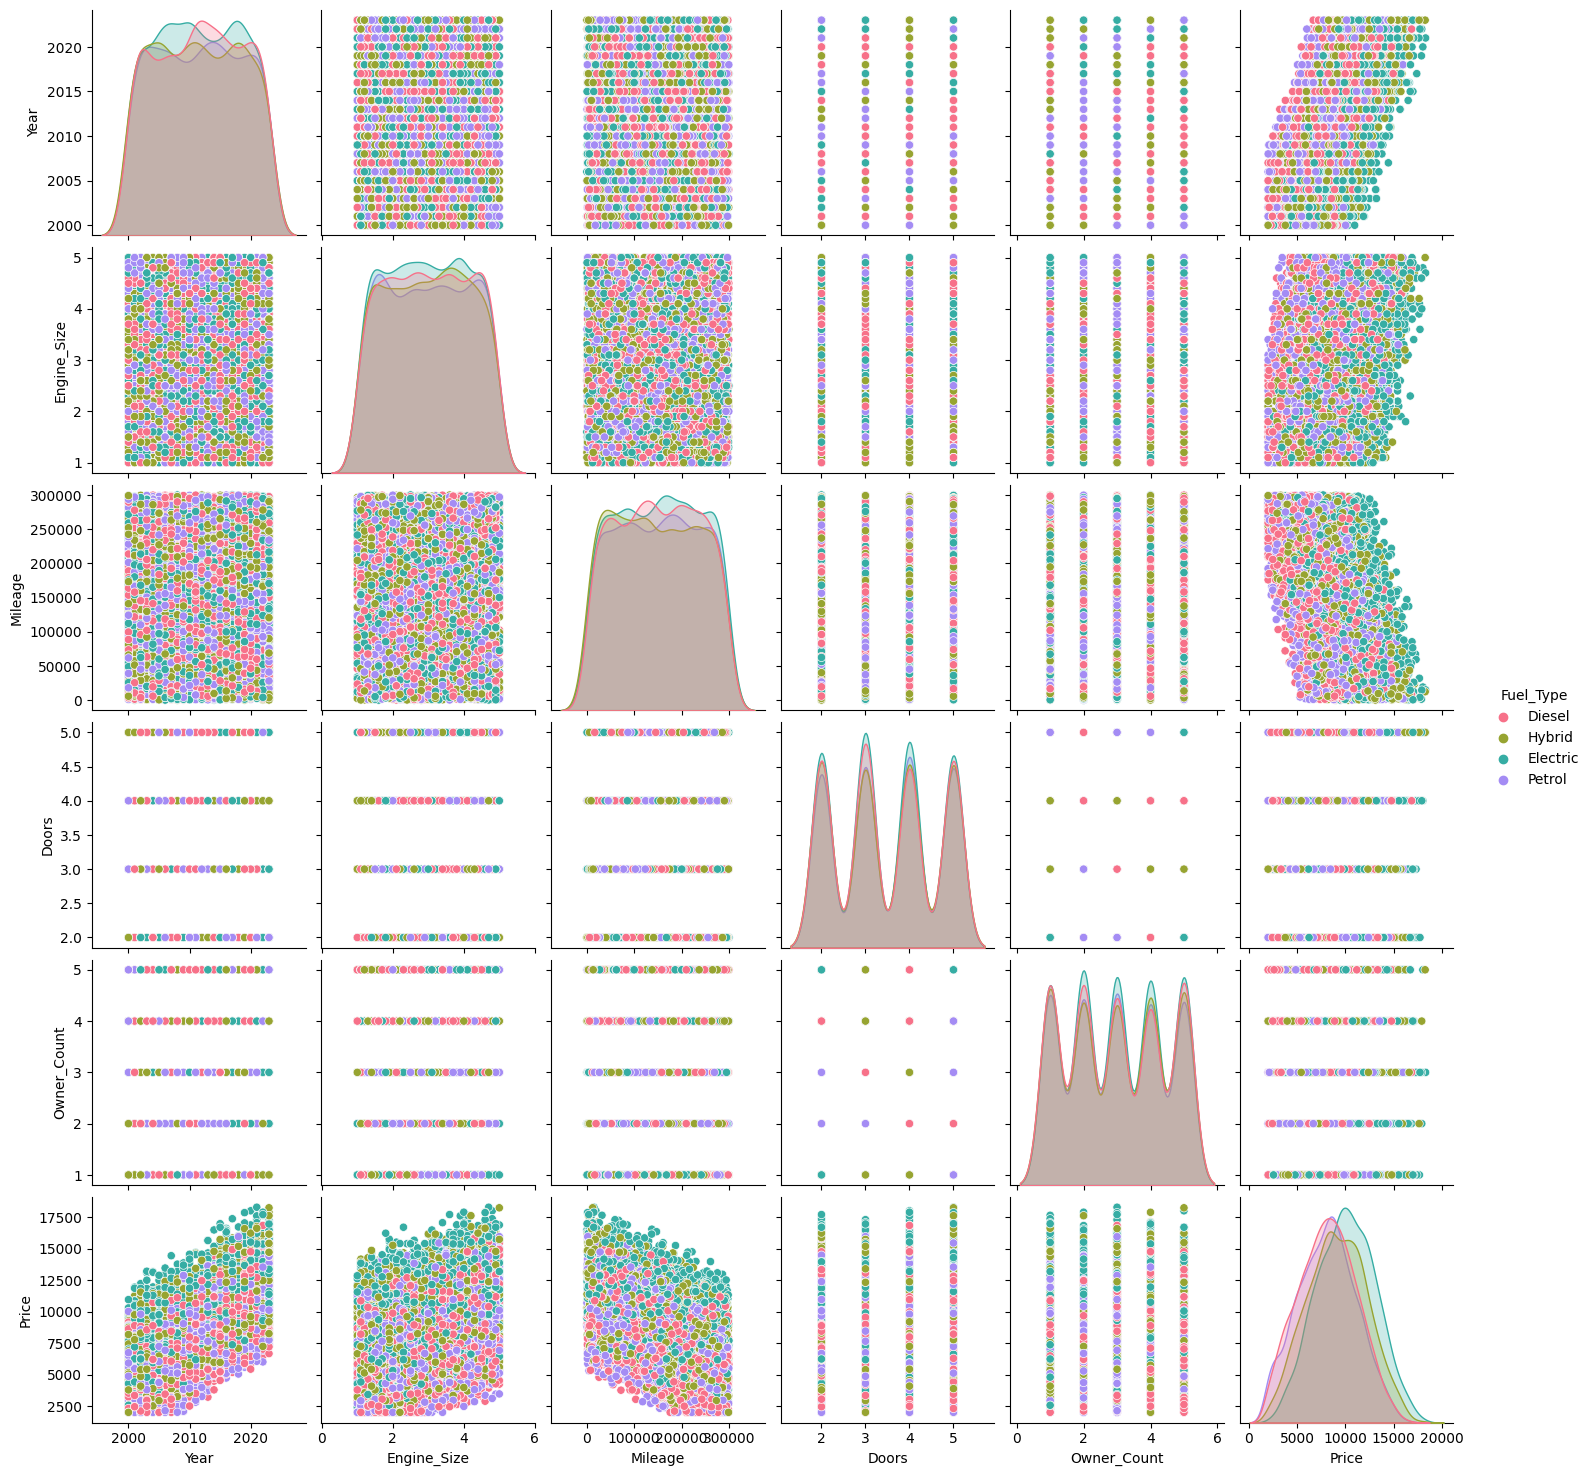

In [15]:
# Pairplot to explore relationships between numerical features and the target
sns.pairplot(df, diag_kind="kde", hue="Fuel_Type", palette="husl")
plt.show()

In [19]:
# Encode categorical features
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=["Brand", "Model", "Fuel_Type", "Transmission"], drop_first=True)

# Display the first few rows after encoding
df_encoded.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2012,2.0,5356,2,3,12092,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2020,4.2,231440,4,2,11171,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,2.0,160971,2,1,11780,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2003,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


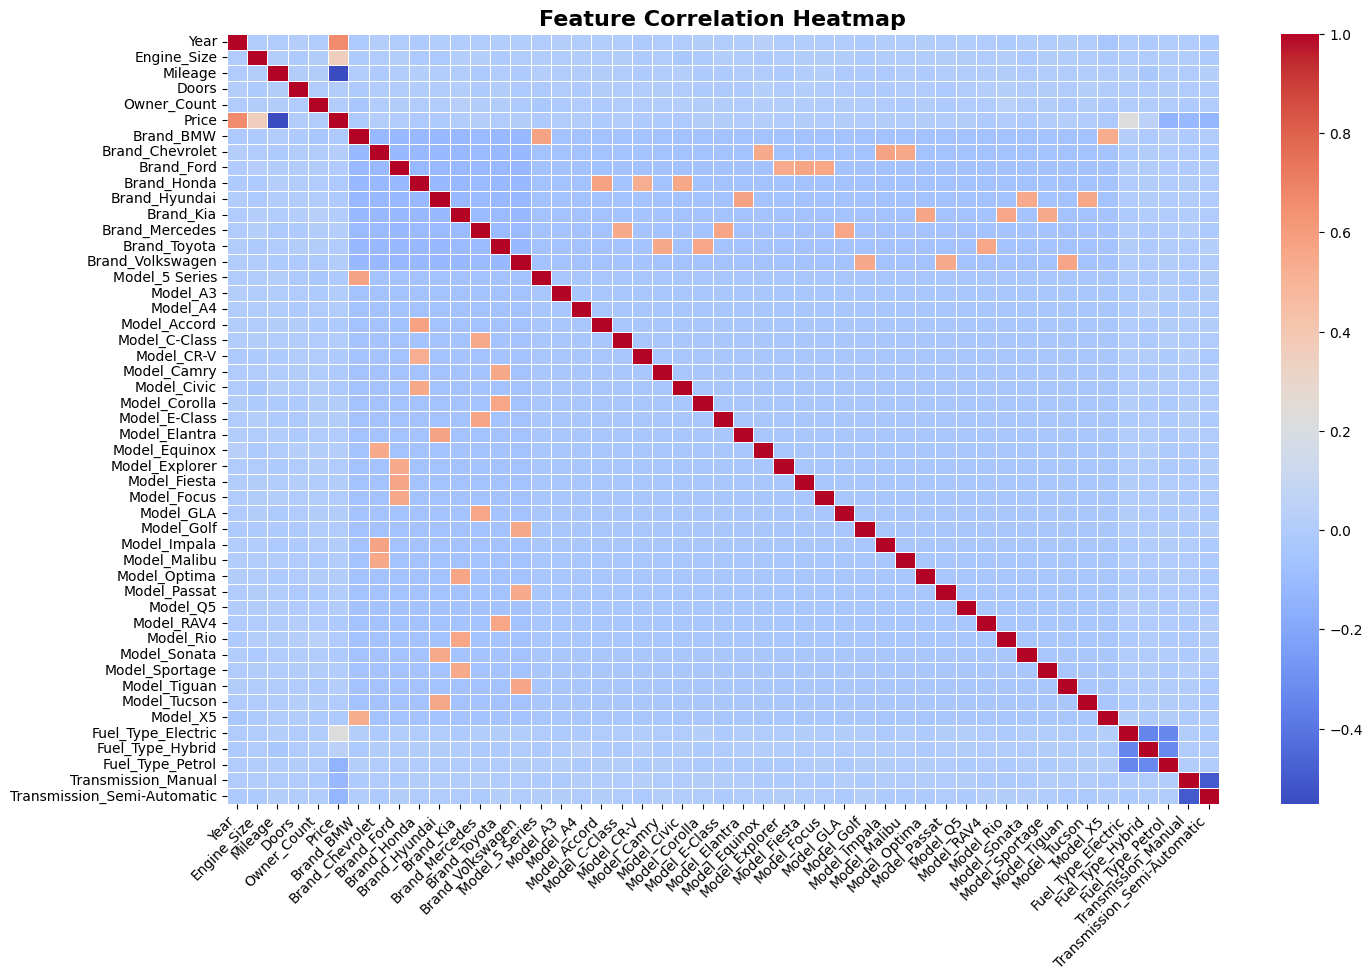

In [21]:
# correlation to understand relationships between features
plt.figure(figsize=(16,10))  # Bigger figure size
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x labels for readability
plt.yticks(fontsize=10)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight="bold")
plt.show()

Our EDA helped us gain key insights into the dataset:

- ✅ No Outliers Found: Boxplots showed no extreme values in Price, Mileage, Year, or other numerical columns.

- ✅ Price Distribution is Approximately Normal: The histogram and KDE plot indicate that car prices follow a roughly normal distribution, making regression models a good fit.

- ✅ Feature Correlations:

- Year has a strong positive correlation with Price, meaning newer cars tend to have higher prices.
Mileage is negatively correlated with Price, which aligns with expectations—higher mileage cars are generally cheaper.
Engine_Size shows a moderate positive correlation with Price, indicating that larger engines contribute to higher prices.
Fuel_Type and Transmission show some impact, but not as strong as mileage and year.
- ✅ Categorical Features Encoded: We applied one-hot encoding to Brand, Fuel_Type, and Transmission, allowing us to include them in further analysis.

## 4. Feature Engineering

Since there are no missing values, we do not need to worry about that. What we need to do, though, is scale our data since features like Mileage and Price have different scales, we normalize them to improve model performance. Standardization improves model convergence and prevents bias toward larger values and is essential for distance-based models (e.g., KNN, SVM). Additionally, since machine learning models work with numerical data, we need to convert categorical features into numerical form. Before training, we need to split our dataset into features (X) and target (y) and create a train-test split.

In [23]:
# Define columns to scale
num_features = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price"]

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

In [24]:
# Define features and target
X = df_encoded.drop("Price", axis=1)  # Independent variables
y = df_encoded["Price"]  # Target variable

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (8000, 48)
Testing Set Shape: (2000, 48)


## 5. Model Selection and Training

Since we’re working with a continuous target variable (Price), this is a Regression Problem.

✅ Candidate Models:
- 1️⃣ Linear Regression → Simple & interpretable.
- 2️⃣ Random Forest Regressor → Handles non-linearity well.
- 3️⃣ Gradient Boosting (XGBoost, LightGBM) → Often gives the best performance.
- 4️⃣ Support Vector Regression (SVR) → Good for small datasets but slower.

We'll train multiple models and compare their performances.

#### **Linear Regression**

In [25]:
# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

Linear Regression - MAE: 0.006428741231032289, MSE: 0.0004349777505972799, R²: 0.9995413754965067


#### **Random Forest Regression**

In [26]:
# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MAE: 0.14093501535187997, MSE: 0.030475000297652162, R²: 0.9678682832368394


#### **XGBoost Regression**

In [27]:
# Initialize and train model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}, MSE: {mse_xgb}, R²: {r2_xgb}")

XGBoost - MAE: 0.04947558838317484, MSE: 0.004015911071463815, R²: 0.9957657714246435


In [ ]:
# Initialize SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Predictions (inverse transform to get back original scale)
y_pred_svr_scaled = svr_model.predict(X_test)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()

# Evaluate SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MAE: {mae_svr}, MSE: {mse_svr}, R²: {r2_svr}")

#### **Support Vector Regression (SVR)**

Note: Since SVR is sensitive to feature magnitudes, we need to scale X_train, X_test, y_train, and y_test

In [28]:
# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scale target (reshaped for single column)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [29]:
# Initialize SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Predictions (inverse transform to get back original scale)
y_pred = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Evaluate SVR
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"SVR - MAE: {mae_svr}, MSE: {mse_svr}, R²: {r2_svr}")

SVR - MAE: 0.050863567461729334, MSE: 0.00415462290001128, R²: 0.9955643804030924


In [30]:
# Store results in a DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "SVR"],
    "MAE": [mae_lr, mae_rf, mae_xgb, mae_svr],
    "MSE": [mse_lr, mse_rf, mse_xgb, mse_svr],
    "R² Score": [r2_lr, r2_rf, r2_xgb, r2_svr]
})

# Sort by best R² Score
print(results.sort_values(by="R² Score", ascending=False))

               Model       MAE       MSE  R² Score
0  Linear Regression  0.006429  0.000435  0.999541
2            XGBoost  0.049476  0.004016  0.995766
3                SVR  0.050864  0.004155  0.995564
1      Random Forest  0.140935  0.030475  0.967868


## 7. Conclusion

In this project, we built a machine learning model to predict car prices based on various features such as brand, model, year, engine size, fuel type, and mileage. We followed a structured approach that included data exploration, preprocessing, model training, and evaluation. Key findings are:

- ✅ Linear Regression outperformed all other models, achieving an R² score of 0.9995, indicating an almost perfect fit to the data. This suggests that the relationships between the features and car prices are highly linear, making it an ideal choice for this problem.

- ✅ XGBoost and SVR also performed well, with R² scores above 0.995, but they did not significantly improve upon Linear Regression.

- ❌ Random Forest had the lowest performance, with an R² score of 0.9679, which, while still high, was noticeably lower than the other models.